In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
usecols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']

data = pd.read_csv('./housing.csv',usecols=usecols)

In [3]:
print(data.shape)

(20640, 10)


In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
data['total_bedrooms']=data.total_bedrooms.fillna(0)

In [12]:
data['rooms_per_household']=(data['total_rooms']/data['households'])
data['bedrooms_per_room']=(data['total_bedrooms']/data['total_rooms'])
data['population_per_household']=(data['population']/data['households'])

In [14]:
data.describe(include=["O"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [15]:
data['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [16]:
#A1: <1H OCEAN

In [19]:
data_numeric = data.copy()
data_numeric = data.drop(["ocean_proximity","median_house_value"], axis=1)
data_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [20]:
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.084836,-0.104112,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047


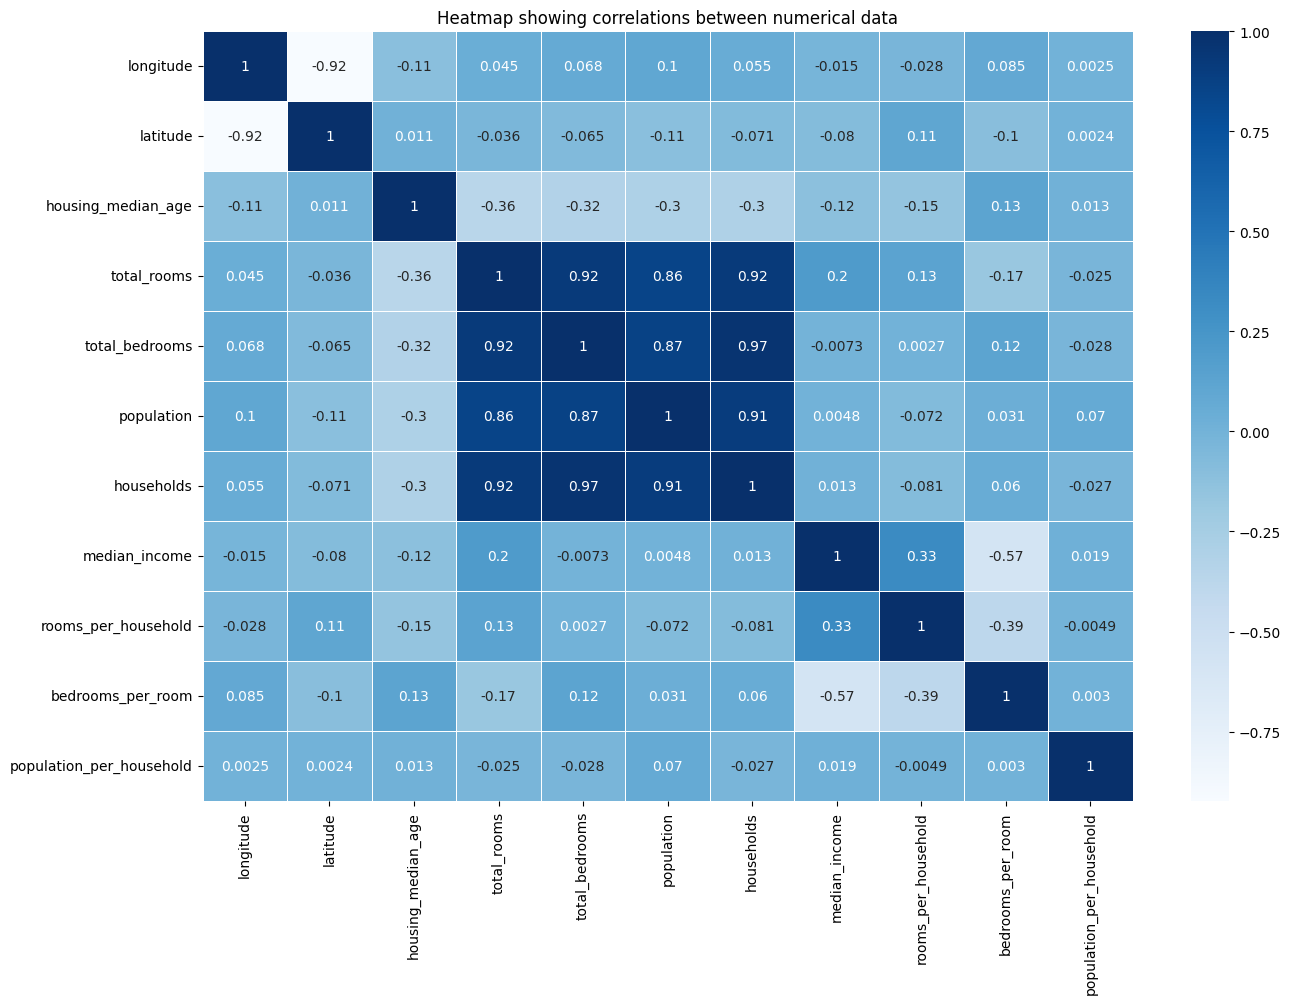

In [32]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [43]:
pd.set_option('display.max_rows', None)  # or 1000
data_numeric.corr().abs().unstack().sort_values(kind="quicksort",ascending = False)

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population                population                  1.000000
population_per_household  population_per_household    1.000000
households                total_bedrooms              0.966507
total_bedrooms            households                  0.966507
latitude                  longitude                   0.924664
longitude                 latitude                    0.924664
total_bedrooms            total_rooms                 0

In [44]:
#A2 total_bedrooms and households

In [68]:
data_class = data.copy()
mean = data_class['median_house_value'].mean()

data_class['above_average'] = np.where(data_class['median_house_value']>mean,1,0)

In [69]:
data_class = data_class.drop('median_house_value', axis=1)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [72]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [73]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [74]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [75]:
from sklearn.metrics import mutual_info_score

In [76]:
cat = ['ocean_proximity']

In [77]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [78]:
df_mi

,MI
ocean_proximity,0.101384


In [79]:
#A3 0.10

In [80]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [81]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
num = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

In [83]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)


DictVectorizer(sparse=False)

In [84]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

0.84


In [85]:
#A4 0.84

In [86]:
features = cat + num
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [90]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

ocean_proximity 0.021928294573643425 0.8180717054263565


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

latitude 0.005939922480620141 0.8340600775193798


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

longitude 0.005939922480620141 0.8340600775193798


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

housing_median_age 0.010058139534883659 0.8299418604651163


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

total_rooms 0.0027906976744185297 0.8372093023255814


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

total_bedrooms 0.0027906976744185297 0.8372093023255814


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

population 0.01974806201550383 0.8202519379844961


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

households 0.007877906976744176 0.8321220930232558


DictVectorizer(sparse=False)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

median_income 0.05608527131782948 0.7839147286821705


In [91]:
#A5 population

In [92]:
data['median_house_value']=np.log1p(data['median_house_value'])

In [93]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [94]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [97]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [98]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [99]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [100]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

DictVectorizer(sparse=False)

In [101]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [104]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

Ridge(alpha=0, random_state=42)

0 0.327


Ridge(alpha=0.01, random_state=42)

0.01 0.327


Ridge(alpha=0.1, random_state=42)

0.1 0.327


Ridge(alpha=1, random_state=42)

1 0.327


Ridge(alpha=10, random_state=42)

10 0.327


In [105]:
#A6 0 (alpha=0)